# Frequency of amino acids along protein sequence

Proteins are amazing biomolecules, they fullfill numerous tasks within cells: from building strutures such as the cytoskeleton to serve as biochemical reaction catalysts, replicate and transcribe DNA, synthetize other proteints, sense external and internal regulatory signals, regulate gene expression... to name just a few! 

Proteins are constituted by (rather long) chains of [amino acids](https://en.wikipedia.org/wiki/Amino_acid). And amino acids are very cool, rather small, molecules which have a constant part, an amino and an acid group (yeah, hence the name) and a variable part which is chemically diverse and unique to each amino acid. There are 20 [proteinogenic](https://en.wikipedia.org/wiki/Proteinogenic_amino_acid) amino acids, that is, amino acids that form proteins &mdash; well 20 plus two more that are not encoded in the [genetic code](https://en.wikipedia.org/wiki/Genetic_code).

Here is a colorful depiction* of all 20 proteinogenic amino acids encoded in the genetic code:

![aminoacids](amino-acid-structures_med.jpeg)

*Cornell, B. 2016. Amino Acids. \[ONLINE\] Available at: http://ib.bioninja.com.au. \[Accessed 18 October 2018\]


The sequence in which the amino acids are arranged determines the physicochemical properties of a protein, and so its possible functions. Thus protein sequence has been subject to evolution to certain extend. Thinking about amino acids the following question popped in my mind: could we find any general patterns in the distribution of amino acid types along the amino acid chain that constitutes a protein? Well, to be honest, I also got inspired by a cool project by [David McClure](http://dclure.org/labs/distributions-of-words-27k-novels/), where he analyzes the frequency of words across narrative time for thousands of novels. He discovers that some words tend to accumulate at the beginning of the novels, others do so at the end and yet other ones appear with a more or less constant frequency across the novel. Could we find something similar among protein sequences? Would some amino acids accumulate in certain regions of sequence?

As

We can use for that the entire [UniProt](www.uniprot.com) database. Specifically the *Uniparc* section. There, sequences are groupped in taxonomic clusters and separated into fully (human) curated, the *sprot* section, and non-curated, the *trembl* section.

We can download the curated files, they are text files, write a parser in Python or R, and analyze the frequencies across normalized protein length for all organisms and for specific taxons.



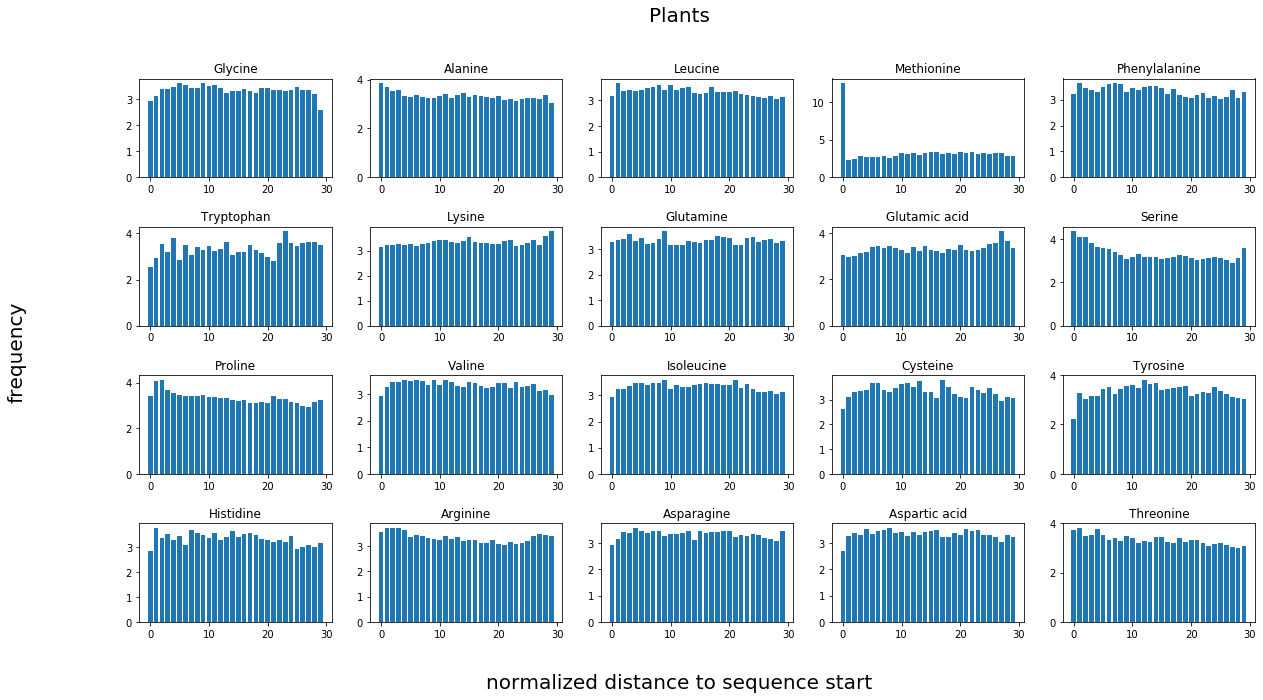

In [1]:
from ParseUniprot import plotfreqAAs
%matplotlib inline
# plt.style.use('dark_background')
FileName = 'uniprot_sprot_plants.txt'
WorkDir = 'C:\\Users\\tinta\\OneDrive\\Documents\\Projects\\UNIPROT\\'

sol = plotfreqAAs(WorkDir+FileName, nsections=30)

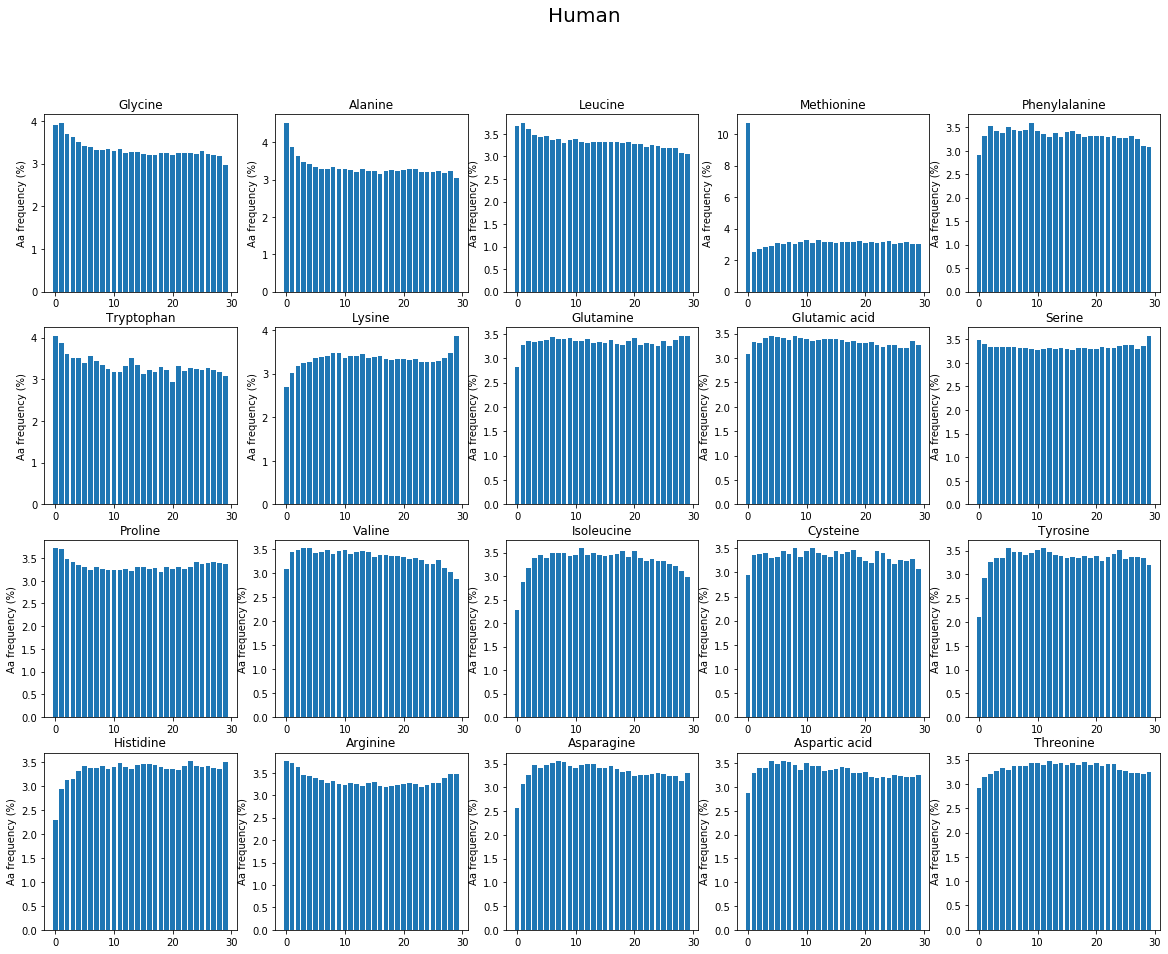

In [2]:
from ParseUniprot import plotfreqAAs
%matplotlib inline
# plt.style.use('dark_background')
FileName = 'uniprot_sprot_human.txt'
WorkDir = 'C:\\Users\\tinta\\OneDrive\\Documents\\Projects\\UNIPROT\\'

sol = plotfreqAAs(WorkDir+FileName, nsections=30)

## Investigating amino acid frequencies in proteins
Let's now plot the amino acid frequencies for a protein and compare the order with the metabolic costs of producing each aminoacid.

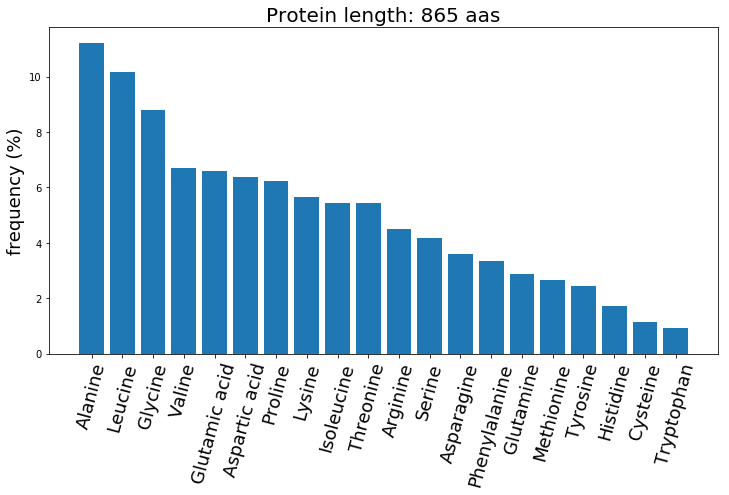

In [4]:
# Extract protein sequences first
#%load_ext autoreload
# %autoreload 2
FileName = 'uniprot_sprot_bacteria.txt'
# WorkDir = 'C:\\Users\\tinta\\OneDrive\\Documents\\Projects\\Frenquency_of_aminoacids\\'
from ParseUniprot import getProtSeq
from ParseUniprot import plot_aminoacid_freq
prot_seq = getProtSeq(WorkDir+FileName,['b0118'])
plot_aminoacid_freq(prot_seq['b0118'])

Total cost: 104576 phosphates/time


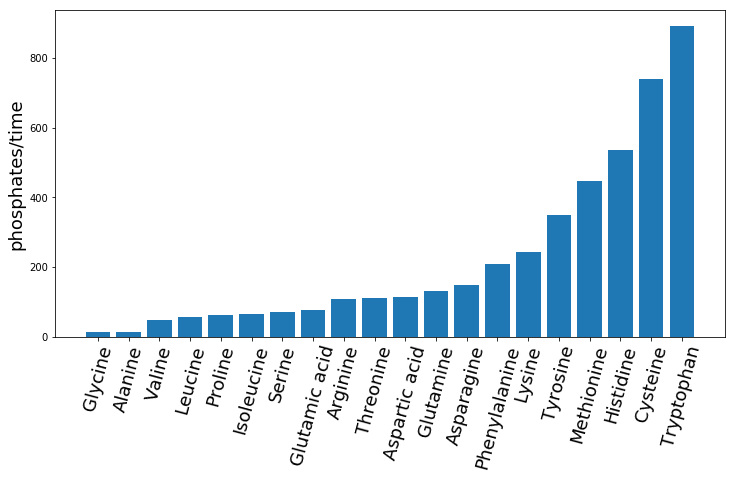

In [8]:
# Let's plot now the amino acids ordered by increasing metabolic cost
%autoreload 2
from ParseUniprot import getProtCost
from matplotlib import pyplot as plt

total_cost = getProtCost(prot_seq['b0118'])
print('Total cost: ' + str(total_cost) + ' phosphates/time')

aminoacids = {'G':'Glycine','A':'Alanine','L':'Leucine','M':'Methionine',
              'F':'Phenylalanine','W':'Tryptophan','K':'Lysine','Q':'Glutamine',
              'E':'Glutamic acid','S':'Serine','P':'Proline','V':'Valine',
              'I':'Isoleucine','C':'Cysteine','Y':'Tyrosine','H':'Histidine',
              'R':'Arginine','N':'Asparagine','D':'Aspartic acid','T':'Threonine'}

aa_costs = {'G':12,'A':12,'V':47,'L':55,'P':61,'I':65,'S':70,'E':77,
            'R':109,'T':112,'D':114,'Q':130,'N':147,'F':208,'K':242,
            'Y':350,'M':446,'H':536,'C':741,'W':892}

aa_name_cost = {}
for aa in aa_costs:
    aa_name_cost[aminoacids[aa]] = aa_costs[aa]

plt.figure(figsize = (12,6))
plt.bar(range(len(aa_name_cost)), list(aa_name_cost.values()), align='center')
plt.xticks(range(len(aa_name_cost)), list(aa_name_cost.keys()),rotation = 75,fontsize = 18)
plt.ylabel('phosphates/time', fontsize = 18)
plt.show()

## On trade offs between reactivity and metabolic cost of amino acids
Most abundant amino acids tend to be those with smaller costs. However, there are certain amino acids that must be present due to their chemical reactivity. I wonder, could be that there is a trade off between amino acid cost and reactivity? Perhaps favoring those that have slightly less reactivity but are cheaper to syntethize?

In fact, some people looked into it! Here: Krick et al. 2014, **Amino Acid Metabolism Conflicts with Protein Diversity**. They take into account amino acid costs and also the different decay rates! Decay time is included in Akashi and Gojobori 2002 along with amino acid costs.

**NOTE** as authors in the first paper point out, not all organisms can produce all amino acids! e.g. humans require ingestion of 6 essential amino acids. From wikipedia:
> *The nine amino acids humans cannot synthesize are phenylalanine, valine, threonine, tryptophan, methionine, leucine, isoleucine, lysine, and histidine (i.e., F V T W M L I K H)*

In [ ]:
from ParseUniprot import plotfreqAAs
FileName = 'uniprot_sprot_human.txt'
WorkDir = 'C:\\Users\\robaina\\OneDrive\\Documents\\Projects\\Frenquency_of_aminoacids\\'
sol = plotfreqAAs(WorkDir+FileName,2)

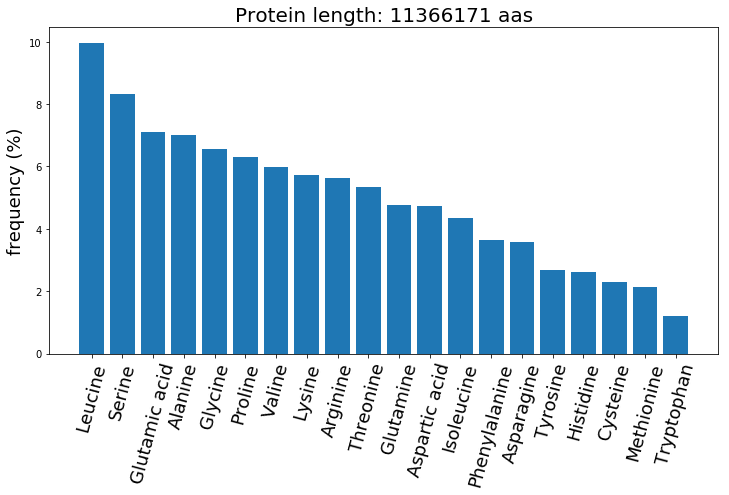

In [9]:
# Let's plot the aminoacid frequencies among all proteins in the bacteria file
from ParseUniprot import plot_aminoacid_freq
proteins_seq  = [y for x in list(sol['protein_seqs'].values()) for y in x]
plot_aminoacid_freq(proteins_seq)

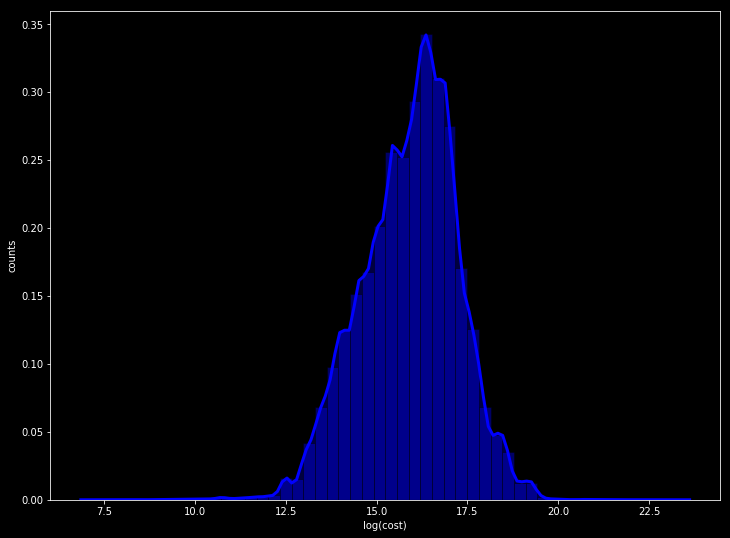

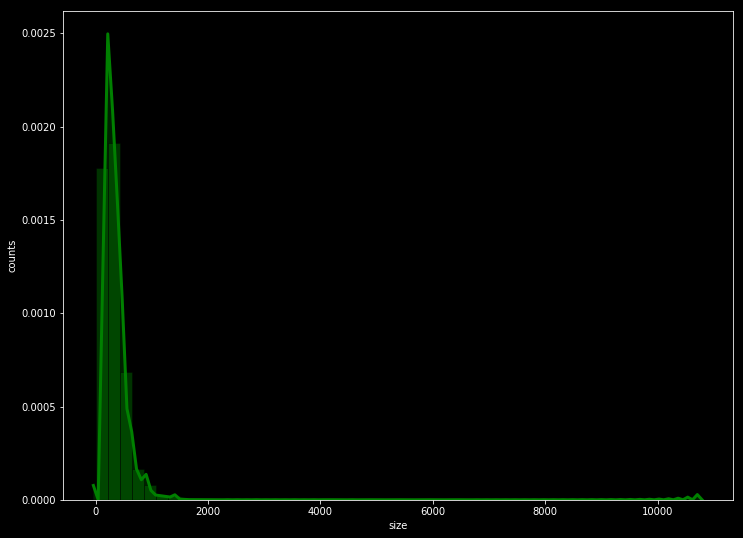

Mean cost: 18210909.351972107


In [1]:
from ParseUniprot import *
%matplotlib inline
plt.style.use('dark_background')
FileName = 'uniprot_sprot_bacteria.txt'
WorkDir = 'C:\\Users\\robaina\\OneDrive\\Documents\\Projects\\BRENDA_and_UNIPROT\\'

costs = np.array(getAllProteinsCosts(WorkDir+FileName))
print('Mean cost: ' + str(np.mean(costs)))